#Trina Chakraborty
2017331041

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Main Signal

In [19]:
signal=[0,1,0,1,0,1,1,0,1,1]
axis= np.arange(0,10,1)


#Line Coding

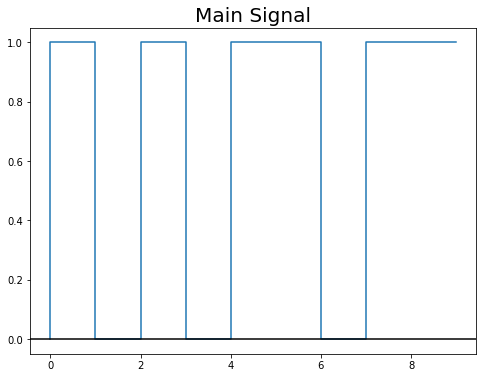

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))
plt.step(axis,signal)
plt.title('Main Signal', fontsize = 20)
plt.axhline(y=0,color='black',linestyle='-')
plt.show()

#unipolar nrz

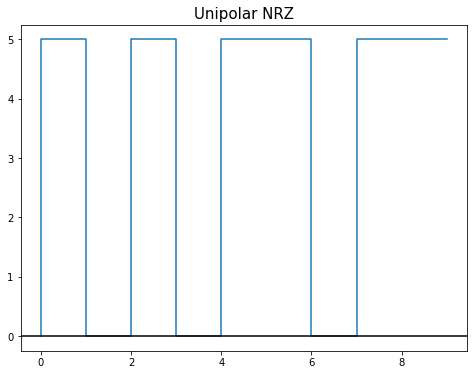

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

unipolar_nrz=[i*5 for i in signal]

plt.step(axis,unipolar_nrz,where='pre')
plt.title('Unipolar NRZ',fontsize=15)
plt.axhline(y=0,color='black',linestyle='-')


#Decoding

In [22]:
result = []
counter = 0
Time = 10e-12 
bit_rate = 1/Time  
for i in range(len(axis)):
  if axis[i]*bit_rate >= counter:
    counter = counter + 1
    result.append(int(signal[i]))

print(result)

[0, 1, 0, 1, 0, 1, 1, 0, 1, 1]


# Polar NRZ-L

[5, -5, 5, -5, 5, -5, -5, 5, -5, -5]


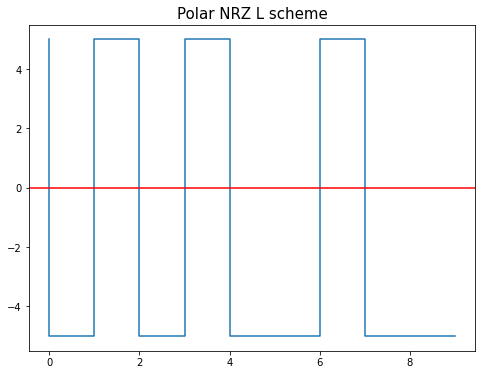

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
nrzl_signal = [((-1)**i)*5 for i in signal]
print(nrzl_signal)
plt.step(axis, nrzl_signal , where = 'pre')
plt.axhline(y=0.0, color='r', linestyle='-')
plt.title('Polar NRZ-L scheme', fontsize = 15)
plt.show()

#Decoding

In [24]:
result = []
counter = 0
last_bit = 0
for i in range(len(axis)):
  if axis[i]*bit_rate >= counter:
    counter = counter + 1
    if nrzl_signal[i]<0:
      result.append(1)
      
    else:
      result.append(0)

print(result)

[0, 1, 0, 1, 0, 1, 1, 0, 1, 1]


#NRZ-I

[5, -5, -5, 5, 5, -5, 5, 5, -5, 5]


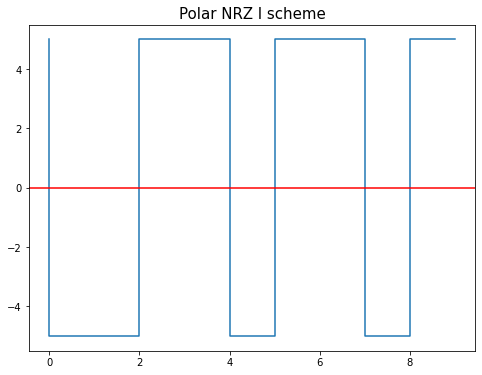

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
nrz_i=[]
prev_cnt=5
for i in range(0,10):
  if (signal[i]==0):
    nrz_i.append(prev_cnt)
  else:
    nrz_i.append(prev_cnt*(-1))
    prev_cnt=prev_cnt*(-1)
print(nrz_i)
plt.step(axis, nrz_i , where = 'pre')
plt.axhline(y=0.0, color='r', linestyle='-')
plt.title('Polar NRZ I scheme', fontsize = 15)
plt.show()

#Decoding

In [26]:
result = []
counter = 0
last_bit = 0
for i in range(len(axis)):
  if axis[i]*bit_rate >= counter:
    counter = counter + 1
    if signal[i] != last_bit:
      result.append(1)
      last_bit=-last_bit
    else:
      result.append(0)

print(result)

[0, 1, 0, 1, 0, 1, 1, 0, 1, 1]


#Bipolar-AMI

[0, 5, 0, -5, 0, 5, -5, 0, 5, -5]


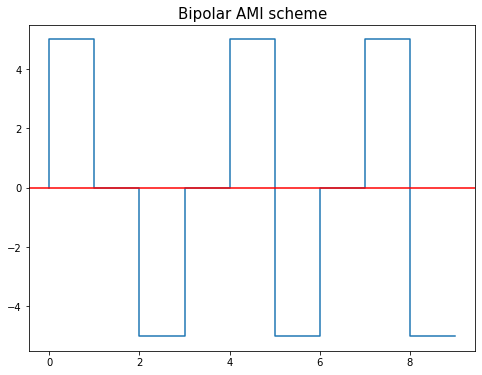

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
prev_cnt=-5;
ami_signal=[]
for i in signal:
  if signal[i]==0:
    ami_signal.append(0)
  else:
    prev_cnt=prev_cnt*(-1)
    ami_signal.append(prev_cnt)
print(ami_signal)
plt.step(axis, ami_signal , where = 'pre')
plt.axhline(y=0.0, color='r', linestyle='-')
plt.title('Bipolar AMI scheme', fontsize = 15)
plt.show()    


#Decoding

In [28]:
result = []
counter = 0
#last_bit = 0
for i in range(len(axis)):
  if axis[i]*bit_rate >= counter:
    counter = counter + 1
    if ami_signal[i] == 0:
      result.append(0)
      #last_bit=-last_bit
    else:
      result.append(1)

print(result)

[0, 1, 0, 1, 0, 1, 1, 0, 1, 1]


#Bipolar Pseudoternary

[5, 0, -5, 0, 5, 0, 0, -5, 0, 0]


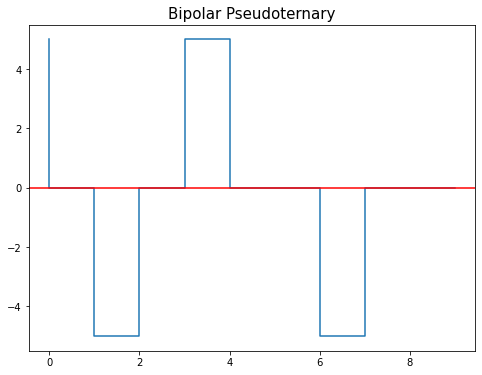

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
prev_cnt=-5;
pseudo_signal=[]
for i in signal:
  if signal[i]==1:
    pseudo_signal.append(0)
  else:
    prev_cnt=prev_cnt*(-1)
    pseudo_signal.append(prev_cnt)
print(pseudo_signal)
plt.step(axis, pseudo_signal , where = 'pre')
plt.axhline(y=0.0, color='r', linestyle='-')
plt.title('Bipolar Pseudoternary', fontsize = 15)
plt.show()

#Decoding

In [30]:
result = []
counter = 0
#last_bit = 0
for i in range(len(axis)):
  if axis[i]*bit_rate >= counter:
    counter = counter + 1
    if pseudo_signal[i] == 0:
      result.append(1)
      #last_bit=-last_bit
    else:
      result.append(0)

print(result)

[0, 1, 0, 1, 0, 1, 1, 0, 1, 1]


#Block Coding - 4B/5B

In [31]:
encoding_code={
"0000": "11110",
"0001": "01001",
"0010": "10100",
"0011": "10101",
"0100": "01010",
"0101": "01011",
"0110": "01110",
"0111": "01111",
"1000": "10010",
"1001": "10011",
"1010": "10110",
"1011": "10111",
"1100": "11010",
"1101": "11011",
"1110": "11100",
"1111": "11101",}

decoding_code={
"11110": "0000",
"01001": "0001",
"10100": "0010",
"10101": "0011",
"01010": "0100",
"01011": "0101",
"01110": "0110",
"01111": "0111",
"10010": "1000",
"10011": "1001",
"10110": "1010",
"10111": "1011",
"11010": "1100",
"11011": "1101",
"11100": "1110",
"11101": "1111",
    
}
def get_encoding_codes(bits):
  return encoding_code["".join(map(str, bits))]
def get_decoding_codes(bits):
  return decoding_code["".join(map(str, bits))]  


def function_a(bits):
    if len(bits)%4!=0:
      l=(((len(bits)// 4) + 1) * 4)-len(bits)
      l1=np.array(np.zeros(l), dtype=int)
      bits = np.append(bits, l1)

    
    str1=""

    for i in range(0, len(bits), 4):
      str1 += get_encoding_codes(bits[i:i+4])
        
    str1_list = list(str1)
    str1_map = map(int, str1_list)
    encoded_bits = np.array(list(str1_map))
    return encoded_bits   

   

  
def function_b(bits):
  if len(bits) % 5 != 0:
    print("invalid")
    return
  str2 = ""
  for i in range(0, len(bits), 5):
    str2 += get_decoding_codes(bits[i:i+5])
  
  str2_list = list(str2)
  str2_map = map(int, str2_list)
  decoded_bits = np.array(list(str2_map))
  return decoded_bits



In [32]:
bits = np.array([0,1,0,1,0,1,1,0,1,1,1,1], dtype=int) 
bits = function_a(bits)
bits

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1])

[5, -5, -5, 5, -5, -5, 5, -5, 5, 5]


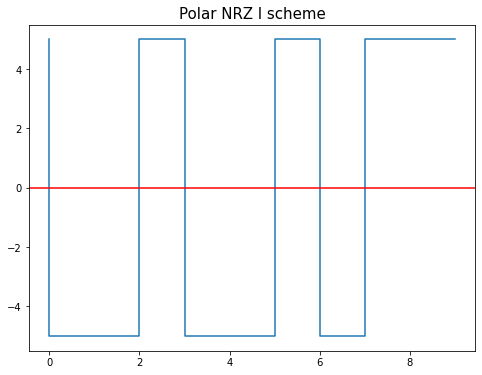

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
nrz_i=[]
prev_cnt=5
for i in range(0,10):
  if (bits[i]==0):
    nrz_i.append(prev_cnt)
  else:
    nrz_i.append(prev_cnt*(-1))
    prev_cnt=prev_cnt*(-1)
print(nrz_i)
plt.step(axis, nrz_i , where = 'pre')
plt.axhline(y=0.0, color='r', linestyle='-')
plt.title('Polar NRZ-I scheme', fontsize = 15)
plt.show()

In [34]:
result = []
counter = 0
last_bit = 0
for i in range(len(axis)):
  if axis[i]*bit_rate >= counter:
    counter = counter + 1
    if bits[i] != last_bit:
      result.append(1)
      last_bit=-last_bit
    else:
      result.append(0)

print(result)

[0, 1, 0, 1, 1, 0, 1, 1, 1, 0]


In [35]:
decoded_result = function_b(result)
print(decoded_result)

[0 1 0 1 0 1 1 0]
